In [62]:
import os
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import analyze2p.plotting as pplot
# import analyze2p.receptive_fields.utils as rfutils
import analyze2p.utils as hutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.extraction.traces as traceutils
import analyze2p.retinotopy.utils as retutils
import analyze2p.extraction.rois as roiutils

import copy
import importlib


In [37]:
%matplotlib notebook

In [23]:
#### Plotting params
visual_areas, area_colors = pplot.set_threecolor_palette()
pplot.set_plot_params(lw_axes=0.25)

In [7]:
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
traceid = 'traces001'
# -----------------------------------------------------
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
metad = sdata[sdata.experiment.isin(['retino'])].copy()
dkeys = [(va, dk) for (va, dk), g in metad.groupby(['visual_area', 'datakey'])]
CELLS = pd.concat([g for (va, dk), g in cells0.groupby(['visual_area', 'datakey'])\
                                  if (va, dk) in dkeys])
counts = aggr.count_n_cells(CELLS)
print(counts.groupby('visual_area').sum().to_markdown())

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets
| visual_area   |   n_cells |
|:--------------|----------:|
| Li            |      3305 |
| Lm            |      3922 |
| V1            |      4009 |


In [56]:
data_id = '%s_retino' % (traceid)
print(data_id)
# Set output dir
dst_dir = os.path.join(aggregate_dir, 'retinotopy', 'examples')
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
print(dst_dir)

FIGDIR = os.path.join(aggregate_dir, 'FIGURES', 'responsive_examples')



traces001_retino
/n/coxfs01/julianarhee/aggregate-visual-areas/retinotopy/examples


In [10]:
# retinodata
retino_thr=0.01
retino_delay=1
retinodata = aggr.get_aggregate_retinodata(traceid=traceid, 
                        mag_thr=retino_thr, delay_thr=retino_delay)
retino = aggr.get_responsive_retino(retinodata, mag_thr=retino_thr)


/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets
Aggregating retinodata and saving


In [13]:
retino['experiment'] = 'retino'

In [15]:
counts = aggr.count_n_cells(retino, 
                            count_cols=['visual_area', 'datakey', 'experiment', 'cell'])
counts[counts.visual_area=='Li']

,visual_area,datakey,experiment,n_cells
0,Li,20190315_JC070_fov1,retino,23
1,Li,20190315_JC070_fov2,retino,6
2,Li,20190316_JC070_fov1,retino,26
3,Li,20190319_JC067_fov1,retino,5
4,Li,20190320_JC067_fov1,retino,4
5,Li,20190321_JC070_fov1,retino,8
6,Li,20190321_JC070_fov2,retino,6
7,Li,20190322_JC073_fov1,retino,18
8,Li,20190422_JC076_fov1,retino,17
9,Li,20190522_JC089_fov1,retino,9


In [16]:
retino.head()

,phase_az,phase_el,mag_az,mag_el,retinorun,visual_area,datakey,cell,experiment
12,0.462578,0.425813,0.036047,0.035210,retino_run2,Li,20190315_JC070_fov1,150,retino
25,0.821716,-0.263820,0.009066,0.013966,retino_run2,Li,20190315_JC070_fov1,163,retino
27,-0.407812,0.226278,0.017647,0.030322,retino_run2,Li,20190315_JC070_fov1,165,retino
29,0.592031,-0.482914,0.010452,0.011681,retino_run2,Li,20190315_JC070_fov1,167,retino
43,0.869433,-0.544077,0.009079,0.011315,retino_run2,Li,20190315_JC070_fov1,181,retino


## Sort best cells, by visual area

In [79]:
va='Lm'
retino[retino.visual_area==va].sort_values(by=['mag_az', 'mag_el'], ascending=False)

,phase_az,phase_el,mag_az,mag_el,retinorun,visual_area,datakey,cell,experiment
6052,-0.243061,-0.234127,0.098924,0.059681,retino_run2,Lm,20190525_JC084_fov1,112,retino
6024,0.897777,-0.090303,0.077542,0.027665,retino_run2,Lm,20190525_JC084_fov1,82,retino
6361,0.965733,0.589288,0.071476,0.021660,retino_run1,Lm,20190603_JC080_fov1,111,retino
6786,0.655512,0.807188,0.060701,0.022012,retino_run1,Lm,20190627_JC091_fov1,169,retino
6407,1.414048,-0.266884,0.060452,0.064952,retino_run1,Lm,20190603_JC080_fov1,159,retino
...,...,...,...,...,...,...,...,...,...
5485,-0.008047,1.019850,0.003234,0.025070,retino_run1,Lm,20190513_JC078_fov1,11,retino
5558,2.075955,0.486848,0.002966,0.017257,retino_run1,Lm,20190513_JC078_fov1,84,retino
4596,-0.069589,-0.215609,0.002882,0.018174,retino_run1,Lm,20190506_JC080_fov1,42,retino
4719,0.114851,0.147980,0.002202,0.025783,retino_run1,Lm,20190506_JC080_fov1,165,retino


## Select dataset

In [80]:
va='Lm'
dk = '20190525_JC084_fov1'
# -------------------------------------------------------

session, animalid, fovn = hutils.split_datakey_str(dk)
fov='FOV%i_zoom2p0x' % fovn
try:
    roiid = roiutils.get_roiid_from_traceid(animalid, session, fov, 
                                            traceid=traceid)
except Exception as e:
    print(e)
    print("[%s] Unable to get roiid (%s)" % (dk, traceid))
    roiid=None
# Select best retino run (if there are multiple)
all_retinos = pd.DataFrame(retutils.get_average_mag_across_pixels(dk))
retinorun = all_retinos.loc[all_retinos[1].idxmax()][0]
retinoid, RETID = retutils.load_retino_analysis_info(dk, use_pixels=False, roiid=roiid)
print(retinorun, retinoid)
# Get imaging info
scaninfo = retutils.get_protocol_info(dk, run=retinorun)
scaninfo.keys()

retino_run2 analysis002


dict_keys(['acquisition', 'acquisition_base_dir', 'animal_id', 'base_filename', 'frame_idxs', 'frame_nums', 'frame_rate', 'frame_tstamps_sec', 'lines_per_frame', 'nchannels', 'ntiffs', 'nvolumes', 'params_path', 'pixels_per_line', 'raw_simeta_path', 'rawtiff_dir', 'roi_dir', 'rootdir', 'run', 'session', 'slices', 'trace_dir', 'volume_rate', 'stimulus', 'trials'])

In [81]:
# Load ROI traces
soma_traces = retutils.load_roi_traces(dk, run=retinorun,
                 analysisid=retinoid, trace_type='corrected', 
                 detrend_after_average=True, temporal_ds=7)


In [82]:
# Convert to dff
dff_soma = dict((cond, (tdf - tdf.mean(axis=0))/ tdf.mean(axis=0)) \
                for cond, tdf in soma_traces.items())


In [84]:
# Convert x-axis to SEC
frames_tsec = dff_soma['right'].index.to_numpy()*(1./scaninfo['stimulus']['frame_rate'])

cycles_tsec = scaninfo['stimulus']['cycle_start_ixs']*(1./scaninfo['stimulus']['frame_rate'])

In [83]:
# Get best responding cells
mag_thr=0.02
delay_thr=1.0

assigned_, ret_meta = aggr.select_assigned_cells(cells0, 
                                                    sdata, experiments=['retino'])
curr_cells = assigned_[(assigned_.visual_area==va) 
                     & (assigned_.datakey==dk)]
retdf = retutils.get_retino_fft(dk, curr_cells=curr_cells, 
                        mag_thr=mag_thr, delay_thr=delay_thr,
                        create_new=False,use_pixels=False)
# Sort cels by mag ratio
sorted_mags = retdf[['mag_az', 'mag_el']].mean(axis=1).sort_values(ascending=False)
sorted_mags.iloc[0:10]

112    0.079302
113    0.070064
181    0.054013
82     0.052603
157    0.045897
196    0.036561
140    0.036436
177    0.035682
75     0.035343
192    0.034919
dtype: float64

In [93]:
rid =82

<IPython.core.display.Javascript object>


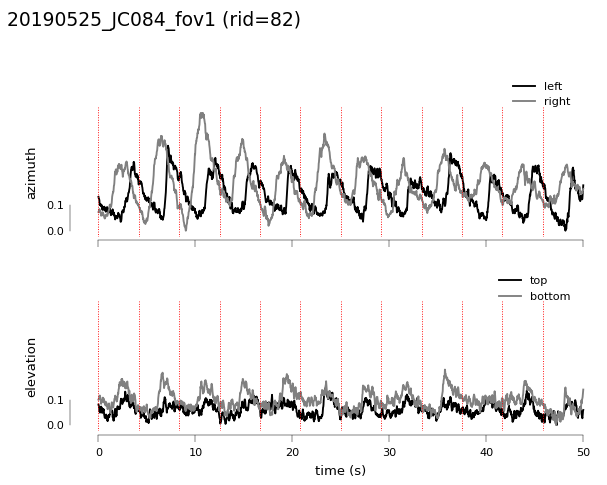

left
right
top
bottom


Text(0.01, 0.95, '20190525_JC084_fov1 (rid=82)')

In [94]:
cond_colors = {'top': 'black', 'bottom': 'grey', 
               'left': 'black', 'right': 'grey'}
cond_dict = {'azimuth': ['left', 'right'],
             'elevation': ['top', 'bottom']}
lw=1

fig, axn = pl.subplots(2, 1, sharex=True, sharey=True, figsize=(5,4), dpi=150)
for ai, (axis_label, cond_pair) in enumerate(cond_dict.items()):
    ax=axn[ai]
    for cond, cond_color in zip(cond_pair, [cond_colors[k] for k in cond_pair]):
        print(cond)
        vs = dff_soma[cond][rid].values
        if min(vs) < 0:
            vs -= np.min(dff_soma[cond][rid].values)
        ax.plot(frames_tsec, vs, lw=lw, color=cond_color, label=cond)
        ax.set_ylabel(axis_label)
    ax.legend(bbox_to_anchor=(0.95,.92), loc='lower right', frameon=False)
    #ax.set_ylim([-0.01, 0.15])
    #if ai==1:
    ax.set_yticks(np.linspace(0, 0.1, 2))
    ax.set_yticklabels(np.linspace(0, 0.1, 2))
    ax.tick_params(which='both', axis='y', size=0)
#     else:
#         ax.set_yticks([])
#         ax.set_yticklabels([])
for ax in axn.flat:
    for cyc in cycles_tsec:
        ax.axvline(x=cyc, ls=':', c='red', lw=0.5)
axn[1].set_xlabel('time (s)')
sns.despine(trim=True, offset=2)

pl.subplots_adjust(bottom=0.2, hspace=0.5, top=0.8, right=0.9, left=0.11)
fig.text(0.01, 0.95, '%s (rid=%i)' % (dk, rid))

# pl.savefig(os.path.join(FIGDIR, 'movingbar__%s_%s_rid%03d.svg' % (va, dk, rid)))
# pl.savefig(os.path.join(dst_dir, 'movingbar__%s_%s_rid%03d.svg' % (va, dk, rid)))
